In [1]:
import metview as mv

import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature#
import cdsapi
# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()
import os



In [5]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = os.getenv("CDS_API_KEY")
KEY = os.getenv("CDS_UID")
c = cdsapi.Client()
#c = cdsapi.Client(url=URL, key=KEY)
DATADIR = './'

# this seems to be lat, lon, lat, lon for upper and lower corner??
area_europe = [72, -25, 34,40]
area_greenland = [85,-75,60,-10]
years = ["2020","2021"]
out_cds=f'{DATADIR}era5_monthly_t2m_greenland.nc'

In [9]:
c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': '2m_temperature',
        'year': years,
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': area_greenland,
        'format': 'netcdf',
    },
    out_cds)


2023-06-09 12:01:52,550 INFO Welcome to the CDS
2023-06-09 12:01:52,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-06-09 12:01:52,728 INFO Request is queued
2023-06-09 12:01:53,792 INFO Request is running
2023-06-09 12:02:01,209 INFO Request is completed
2023-06-09 12:02:01,210 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/adaptor.mars.internal-1686304920.74047-32254-9-76833010-1e4f-4077-bbf9-714143f0b302.nc to ./era5_monthly_t2m_greenland.nc (1.2M)
2023-06-09 12:02:02,184 INFO Download rate 1.2M/s                                                                                             


Result(content_length=1267944,content_type=application/x-netcdf,location=https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/adaptor.mars.internal-1686304920.74047-32254-9-76833010-1e4f-4077-bbf9-714143f0b302.nc)

In [42]:
ds = xr.open_dataset(out_cds)
ds


<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 101, time: 24)
Coordinates:
  * longitude  (longitude) float32 -75.0 -74.75 -74.5 ... -10.5 -10.25 -10.0
  * latitude   (latitude) float32 85.0 84.75 84.5 84.25 ... 60.5 60.25 60.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2021-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-09 10:02:01 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [213]:
ds.longitude

<xarray.DataArray 'longitude' (longitude: 261)>
array([-75.  , -74.75, -74.5 , ..., -10.5 , -10.25, -10.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -75.0 -74.75 -74.5 ... -10.5 -10.25 -10.0
Attributes:
    units:      degrees_east
    long_name:  longitude

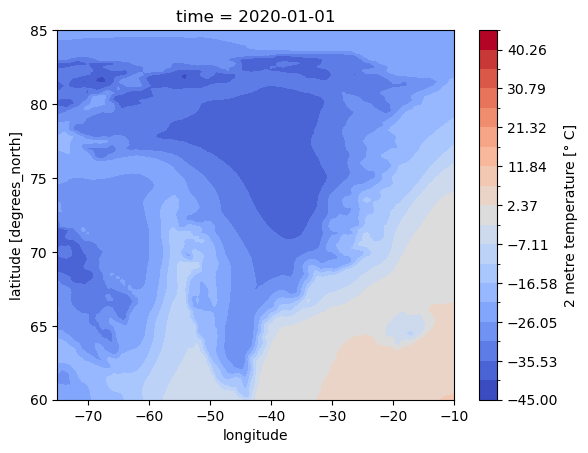

In [119]:
ds_180 = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')
# Create Xarray Data Array
da = ds_180['t2m']
# Create Xarray Data Array
da_degc = ds['t2m'] - 273.15
da_degc = da - 273.15
da_degc = da_degc.assign_attrs(da.attrs)
da_degc.attrs['units'] = '° C'
import matplotlib as mpl
cmap = mpl.cm.coolwarm
#cmap = mpl.cm.RdBu_r
levels=np.linspace(-45,45,20)

da_degc[0,:,:].plot.contourf(cmap=cmap,levels=levels)
#type(da_degc[0,:,:])

In [120]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_colorMaps(cmap):

    fig, ax = plt.subplots(figsize=(4,0.4))
    col_map = plt.get_cmap(cmap)
    mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')

    plt.show()

# for cmap_id in plt.colormaps():
#     print(cmap_id)
#     plot_colorMaps(cmap_id)

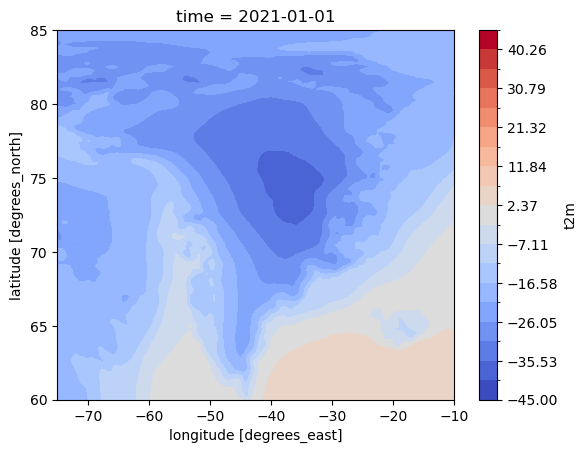

In [121]:

ds_extra= ds['t2m'] - 273.15
#ds_extra[12,:,:].plot()
ds_extra[12,:,:].plot.contourf(cmap=cmap,levels=levels)


In [229]:
# Now for CARRA
#data from carra not in Mars or CDS, reading locally
#fin_carra="t2m-mean_carra-20210101-20210131.grib2"
#carra = mv.read(fin_carra)

import metview as mv
fin_carra="t2m-mean_carra-20210101-20210131.grib2"
carra = mv.read(fin_carra)
ds_carra = carra.to_dataset()
ds_carra["t2m"] = ds_carra["t2m"] -  273.15
da_carra = ds_carra["t2m"]
#lats=da_carra["longitude"].to_dataframe()#["latitude"]
#lons=da_carra["longitude"].to_dataframe()#["longitude"]
#x=da_carra["longitude"].to_array()
#y=da_carra["latitude"].to_array()
#da_carra.longitude
#get_coords = ds.assign_coords(longitude=(((da_carra.longitude + 180) % 360) - 180)).sortby('longitude')
#ds_carra.longitude

In [201]:
#lats["latitude"]
test=da_carra.to_dataframe()
lats=test["latitude"].values
lons=test["longitude"].values

In [205]:
nx=1069
ny=1269
#lats=lats.reshape((nx,ny))
#lons=lons.reshape((nx,ny))
lats

array([55.81      , 55.8174558 , 55.82489948, ..., 77.8739488 ,
       77.85295104, 77.83194769])

1269

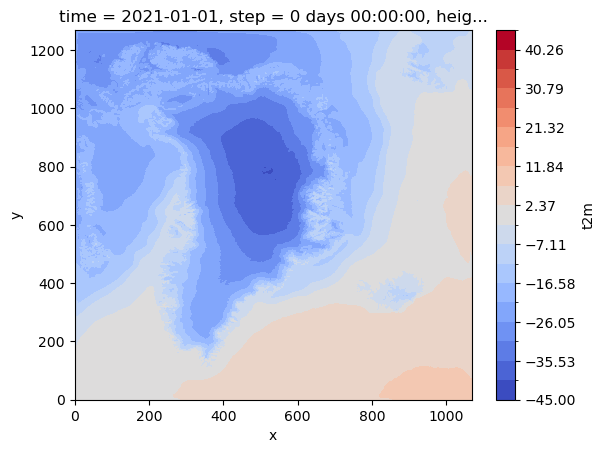

In [227]:
#ds_carra["t2m"].plot()# x=ds_carra["longitude"],y=ds_carra["latitude"])
#levels=np.linspace(-45,45,10)
da_carra.plot.contourf(cmap=cmap,levels=levels)#,x=ds_carra.latitude.values,y=ds_carra.longitude.values)
#help(da_carra.plot.contourf)
len(da_carra.latitude.values)

In [195]:
# fig = plt.figure(figsize=(14, 6))
# da_carra.plot.pcolormesh(ax=ax,  x="longitude", y="latitude")
# plt.show()

In [75]:
#plt.figure(figsize=(14, 6))
#ax = plt.axes()#projection=ccrs.PlateCarree())
#ax.set_global()
#ds_carra["t2m"].plot.pcolormesh(ax=ax,  x="longitude", y="latitude")
#    ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", add_colorbar=False
#)
#ax.coastlines()
#ax.set_ylim([0, 90]);

In [76]:
#ds_carra["t2m"]


In [55]:
# the tests above did not allow me to plot the damn results with lat and lon
# doing the old way below


In [56]:
import copy
import pygrib
import numpy.ma as ma
import datetime

def read_vars(gribfile,params):
    '''
    Reads a file that contains only one time step
    '''
    print("in read_vars")
    ds = {}
    vars = copy.deepcopy(params)
    f = pygrib.open(gribfile)
    was_found=False
    for msg in f:
        for param in vars:
            if vars[param]['param']== str(msg['param']) and vars[param]["level"]==msg["level"] and vars[param]["typeOfLevel"]==msg['typeOfLevel'] and vars[param]["levelType"]==msg["levelType"]:
                print(f'found {vars[param]}')
                vars[param]['msg'] = msg
                was_found=True
        if not was_found:
            #quick check for when it doesnt find anything
            for param in vars:
                print(vars[param]['param'])
                if vars[param]['param']== str(msg['param']):
                    print(f"{param} not found. Printing some info")
                    this_param=msg["param"]
                    this_level=msg["level"]
                    this_tlevel=msg['typeOfLevel']
                    this_ltype=msg["levelType"]
                    print("level :{this_level}")
                    print("typeOfLevel {this_tlevel}")
                    print("levelType {this_ltype}")
                    print("Original params:")
                    print(params)
                    for key in ["param","level","typeOfLevel","levelType"]:
                        new_params = {param:{"param":this_param,"level":this_level,
                                             "typeOfLevel":this_tlevel,"levelType":this_ltype}}
                    print(new_params)
                    sys.exit(0)

    for param in vars:
        msghit = vars[param]['msg']
        nx = msghit['Nx']
        ny = msghit['Ny']
        date = msghit['date']
        hour = msghit['hour']
        fcstep = msghit['step']
        lons = msghit['longitudes'].reshape((ny,nx))
        lats = msghit['latitudes'].reshape((ny,nx))
        lat0 = msghit['LaDInDegrees']
        lon0 = msghit['LoVInDegrees']
        lat1 = msghit['Latin1InDegrees']
        lat2 = msghit['Latin2InDegrees']
        val = ma.masked_values(msghit['values'].reshape((ny,nx)),msghit['missingValue'])
        name = msghit['parameterName']
        vars[param]['field'] = val
        dt = datetime.datetime.strptime(str(date)+str(hour),"%Y%m%d%H")
        lons2 = np.where(lons>180,lons-360,lons)
        lon0 = np.where(lon0>180,lon0-360,lon0)
        proj = ccrs.LambertConformal(central_latitude=lat0,
                                 central_longitude=lon0,
                                 standard_parallels=(lat1, lat2))
        ds['misc'] = {'date':dt,
                      'lons':lons2,
                      'lats':lats,
                      'proj':proj,
                      'fcstep':fcstep}
        ds['params'] = vars

    return ds



In [57]:
params = {'t2m':{"param":"167","level":2,"typeOfLevel":"heightAboveGround","levelType":"sfc"}}

ds_read = read_vars(fin_carra,params)

in read_vars
found {'param': '167', 'level': 2, 'typeOfLevel': 'heightAboveGround', 'levelType': 'sfc'}


Using t2m to plot temperature


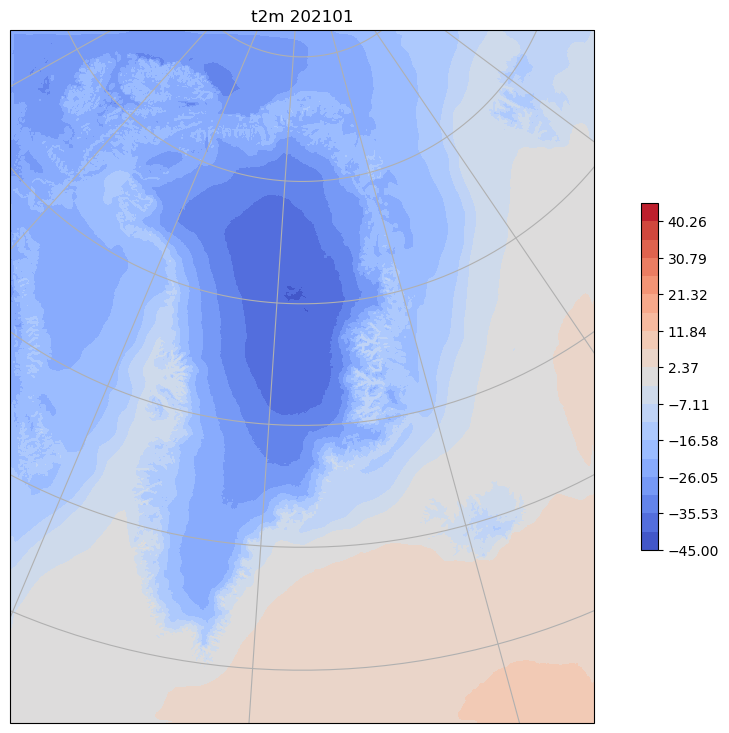

In [118]:
def plot_t2m(ifile,params,suf_png):
    '''
     Plot t2m and wind velocity
    '''
    print(f"Plotting {params} for {ifile}")
    ds = read_vars(ifile,params)
    fig=t2m(ds)
    print(f"Saving plot to {suf_png}")
    plt.savefig(suf_png)
    fig.clf()
    plt.close(fig)
    gc.collect()

def t2m(ds,cmap,levels):
    lons = ds['misc']['lons']
    lats = ds['misc']['lats']
    proj = ds['misc']['proj']
    dt = ds['misc']['date']
    fcstep = ds['misc']['fcstep']

    # Plotting parameters
    t_colors = ['#ffffff','#e6e6e6','#cccccc','#b3b3b3','#ae99ae','#7a667a','#330066','#590080','#8000ff',
                '#0080ff','#00ccff','#00ffff','#26e699','#66bf26','#bfe626','#ffff80','#ffff00','#ffda00',
                '#ffb000','#ff7300','#ff0000','#cc0000','#80002c','#cc3d6e','#ff00ff','#ff80ff','#ffbfff',
                '#e6cce6','#e6e6e6']
    t_levels = np.array([-80,-70,-60,-52,-48,-44,-40,-36,-32,-28,-24,-20,-16,-12,-8,-4,0,
                4,8,12,16,20,24,28,32,36,40,44,48,52,56])
    variable = [key for key in ds["params"].keys()][0]
    print(f"Using {variable} to plot temperature")
    # Fields to plot
    #t2m = ds['params']['t2m']['field'] - 273.15
    t2m = ds['params'][variable]['field'] - 273.15

    fig = plt.figure(figsize=[12,9])
    ax = plt.axes(projection=proj)

    CS = ax.contourf(lons,lats,t2m,transform=ccrs.PlateCarree(),cmap=cmap,levels=levels)#,colors=t_colors,levels=t_levels)
    plt.colorbar(CS,shrink=0.5,orientation='vertical')

    #ax.coastlines('50m')
    ax.gridlines()

    #plt.title("T2M \n%s UTC + %dh" % (dt.strftime('%Y-%m-%d %H:00'), fcstep))
    period=dt.strftime('%Y%m')
    plt.title(f"{variable} {period}")

    return fig
levels=np.linspace(-45,45,20)
fig=t2m(ds_read,cmap,levels)    
plt.show()


In [116]:
#fig.clf()
#plt.close(fig)

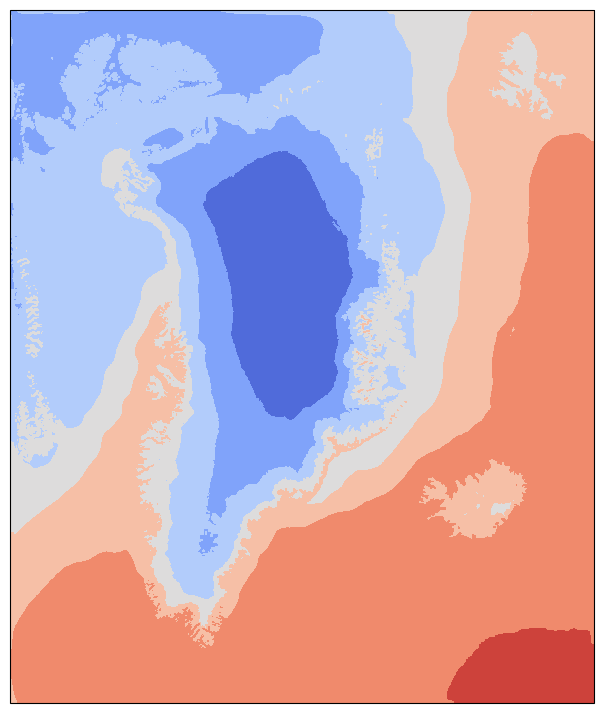

In [230]:
fig = plt.figure(figsize=[12,9])
proj = ds_read['misc']['proj']
ax = plt.axes(projection=proj)
cs=ax.contourf(ds_read['params']["t2m"]['field'],cmap=cmap)
# ax.plot(ds_read['misc']['lons'],ds_read["misc"]["lats"],ds_read['params']["t2m"]['field'] - 273.15)
import matplotlib
norm= matplotlib.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())


In [74]:
ds_read["params"]["t2m"]["field"]

AttributeError: 'MaskedArray' object has no attribute 'plot'